# Final assignment - Group 'W'

## id1 = "205945728"
## id2 = "316519529"
## id3 = "203312277"
## id4 = "323211268"

### name_student_1 = "Eliran Shamriz"
### name_student_2 = "Orel Nistani"
### name_student_3 = "Raz Hefer"
### name_student_4 = "Meysi Teganya"

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import sklearn.tree as tree




In [80]:
url = 'https://raw.githubusercontent.com/shamriz5/DS_test/main/hvm.csv'
data = pd.read_csv(url)
data

,age,gender,occupation,income,physical,mental,vacfreq,status,hshopping,hrecreation,hfood,hcharity,loan,food,savings,recreation,charity,shopping,heatlhcare,satisfaction
0,22,Female,Student,5,4,3,3.0,Single,5,5,4,4,1,3,4,4,2,5,4,3
1,21,Male,Student,4,4,5,4.0,In a relationship,1,5,5,1,2,4,3,4,1,1,2,5
2,20,Female,Student,2,3,3,2.0,In a relationship,2,5,3,5,1,3,2,4,2,2,5,4
3,21,Female,Student,1,3,3,1.0,Single,3,2,3,2,1,3,2,3,1,3,2,2
4,20,Male,Student,2,5,5,5.0,Single,2,3,3,3,1,4,4,2,3,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,21,Male,Working,2,4,5,3.0,Single,4,3,5,3,3,5,5,4,4,5,3,5
203,24,Male,Working,1,2,2,1.0,Single,1,1,3,1,1,3,3,1,1,1,2,3
204,23,Male,Student,1,2,3,0.0,Single,2,2,2,2,2,2,2,2,2,2,2,2
205,18,Male,Student,4,3,5,0.0,Single,3,3,3,2,1,3,3,3,3,3,3,2


### 1. First of all we'll check the data, and see if there is any problems:

#### Treat missing values - as we can see there is no Nan values

In [81]:
data.isnull().sum().sort_values(ascending=False)

satisfaction    0
heatlhcare      0
gender          0
occupation      0
income          0
physical        0
mental          0
vacfreq         0
status          0
hshopping       0
hrecreation     0
hfood           0
hcharity        0
loan            0
food            0
savings         0
recreation      0
charity         0
shopping        0
age             0
dtype: int64

#### Fixing data types

In [82]:
data.dtypes

age               int64
gender           object
occupation       object
income            int64
physical          int64
mental            int64
vacfreq         float64
status           object
hshopping         int64
hrecreation       int64
hfood             int64
hcharity          int64
loan              int64
food              int64
savings           int64
recreation        int64
charity           int64
shopping          int64
heatlhcare        int64
satisfaction      int64
dtype: object

### 2. Before each insight we will copy the data for making changes, because we dont want to harm the original DB

In [83]:
Insight1 = data.copy()

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='age'>

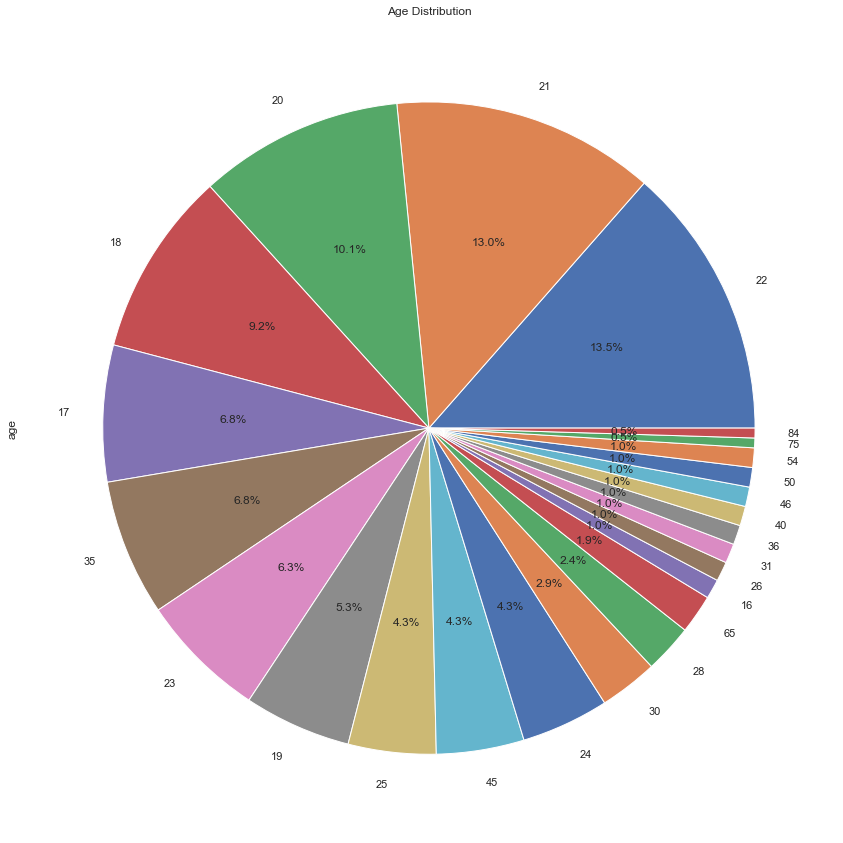

In [84]:
plt.figure(1, figsize=(15,15))
plt.title("Age Distribution")
Insight1['age'].value_counts().plot.pie(autopct="%1.1f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

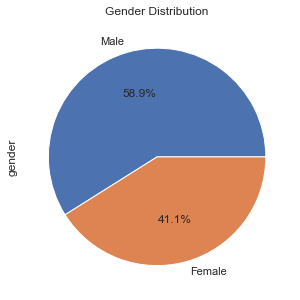

In [85]:
plt.figure(1, figsize=(5,5))
plt.title("Gender Distribution")
Insight1['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

### Insight 1 - Exiting the university into the job market - Where is better ? :)

##### Participants

###### First we will drop the 'homemaker' culomn because we dont want to take then into our cosiduration in this specific insight

In [86]:
Insight1 = Insight1.drop(index = Insight1[Insight1['occupation']=='Home maker'].index)

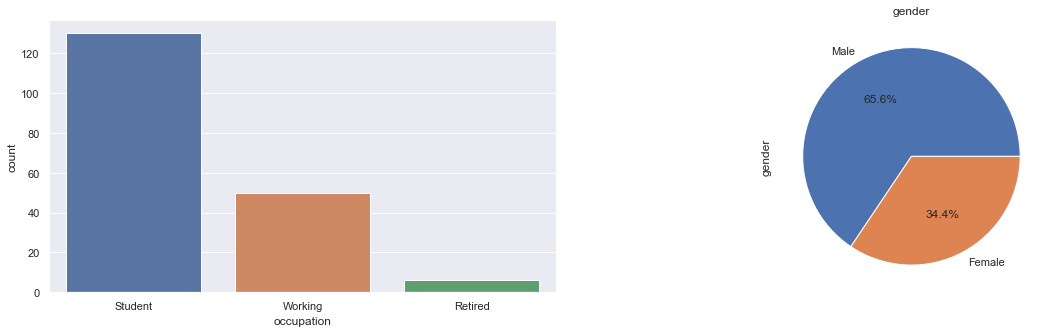

In [87]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
sns.countplot(ax=axes[0], x="occupation", data=Insight1)

plt.figure(1, figsize=(5,5))
plt.title("gender")
Insight1['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


###### We created Pivot Table to prepare the data before we will work on it

In [88]:
Insight1.pivot_table(['physical','mental','satisfaction'],'occupation')

,mental,physical,satisfaction
occupation,,,
Retired,2.833333,2.500000,2.833333
Student,3.892308,3.653846,3.730769
Working,3.560000,3.540000,3.560000


#### Bottom line - you'd better stay student!! (naaaaaaaaaa)

## Understanding the data

In [89]:
features = ['age', 'gender','occupation','income', 'physical', 'mental', 'vacfreq', 'status', 'loan', 'food','savings','recreation','charity','shopping','heatlhcare','satisfaction']

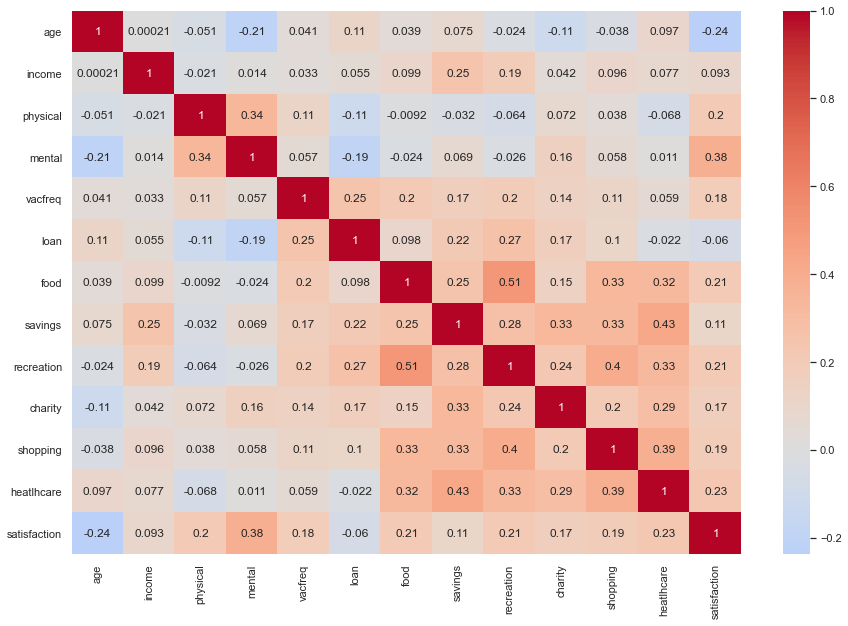

In [90]:
corrs = Insight1[features].corr(method = 'kendall')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

### Insight 2 - is there correlation between the amount of your money and your satisfication ?

#### as we can see in the heat map below and the boxplot underneath there is no correlation between the income rate and the satisfication

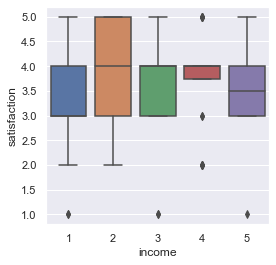

In [91]:
plt.figure(figsize=(4,4))
sns.boxplot(x='income', y='satisfaction', data=Insight1);

#### However there is a correlation between mental rate and satisfication and in addition, between heatlhcare and the shopping rate.

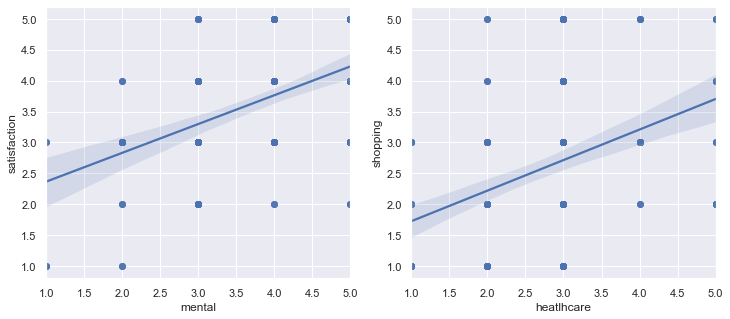

In [92]:
plt.figure(figsize=(12,5))
#subplot(nrows, ncols, index)
plt.subplot(1, 2, 1)
sns.regplot(data=Insight1, x='mental', y='satisfaction')

plt.subplot(1, 2, 2)
sns.regplot(data=Insight1, x='heatlhcare', y='shopping') 

plt.show()


## Insight3 - which decade is better ? 

In [93]:
Insight3=data.copy()
Insight3.loc[0:206,['age']] = Insight3["age"]//10
Insight3

,age,gender,occupation,income,physical,mental,vacfreq,status,hshopping,hrecreation,hfood,hcharity,loan,food,savings,recreation,charity,shopping,heatlhcare,satisfaction
0,2,Female,Student,5,4,3,3.0,Single,5,5,4,4,1,3,4,4,2,5,4,3
1,2,Male,Student,4,4,5,4.0,In a relationship,1,5,5,1,2,4,3,4,1,1,2,5
2,2,Female,Student,2,3,3,2.0,In a relationship,2,5,3,5,1,3,2,4,2,2,5,4
3,2,Female,Student,1,3,3,1.0,Single,3,2,3,2,1,3,2,3,1,3,2,2
4,2,Male,Student,2,5,5,5.0,Single,2,3,3,3,1,4,4,2,3,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2,Male,Working,2,4,5,3.0,Single,4,3,5,3,3,5,5,4,4,5,3,5
203,2,Male,Working,1,2,2,1.0,Single,1,1,3,1,1,3,3,1,1,1,2,3
204,2,Male,Student,1,2,3,0.0,Single,2,2,2,2,2,2,2,2,2,2,2,2
205,1,Male,Student,4,3,5,0.0,Single,3,3,3,2,1,3,3,3,3,3,3,2


In [94]:
sat_1=Insight3.loc[0:46,['satisfaction']].mean()
sat_2=Insight3.loc[47:160,['satisfaction']].mean()
sat_3=Insight3.loc[161:184,['satisfaction']].mean()
sat_4=Insight3.loc[185:197,['satisfaction']].mean()
sat_5=Insight3.loc[198:201,['satisfaction']].mean()
sat_6=Insight3.loc[202:204,['satisfaction']].mean()
sat_7=Insight3.loc[205:205,['satisfaction']].mean()
sat_8=Insight3.loc[206:206,['satisfaction']].mean()


d=[sat_1,sat_2,sat_3,sat_4,sat_5,sat_6,sat_7,sat_8]
df=DataFrame(data=d, columns = ['satisfaction'])
df=DataFrame({'satisfaction':[4.08,3.543,3.37,3.84,3,3,1,4],'century':[1,2,3,4,5,6,7,8]})
df

,satisfaction,century
0,4.080,1
1,3.543,2
2,3.370,3
3,3.840,4
4,3.000,5
5,3.000,6
6,1.000,7
7,4.000,8


<AxesSubplot:xlabel='age', ylabel='satisfaction'>

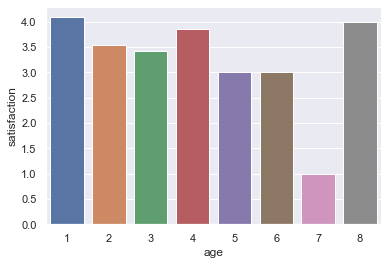

In [95]:
sns.barplot(x="age", y="satisfaction", data= Insight3, ci = None)

### Insight 4 - income vs charity - who is donate more ? 

In [96]:
Insight4=data.copy()

<AxesSubplot:xlabel='occupation', ylabel='income'>

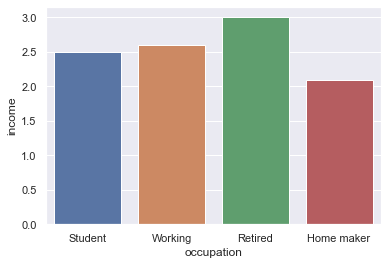

In [97]:
sns.barplot(x="occupation", y="income", data= Insight4, ci = None)

#### -As we can see the occupation with the biggest sallary is the retired occupation and the home maker occupation has the smaller sallary-

<AxesSubplot:xlabel='occupation', ylabel='charity'>

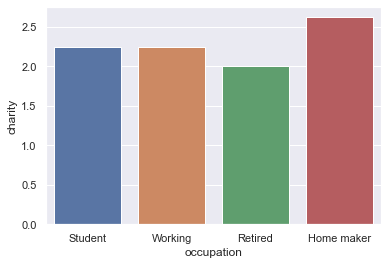

In [103]:
sns.barplot(x="occupation", y="charity", data= Insight4, ci = None)

#### -Surprisingly, the home maker give the most charity and not the retired occupation-

### Insight 5 - Male vs Female - who is shopping more?
### what do you think?

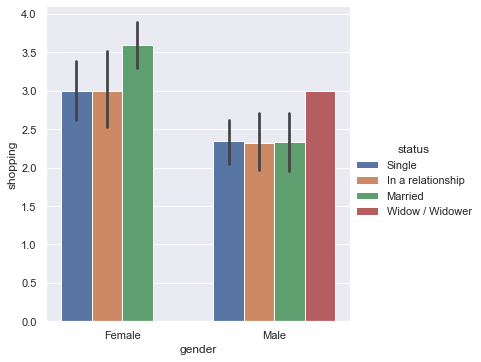

In [104]:
sns.catplot(x="gender", y="shopping", hue="status", kind="bar", data=Insight4)
plt.show()

### קצת בשביל להעלות חיוך  
אז כמובן שנשים קונות יותר וביחוד הנשואות. אבל למרבה ההפתעה מי שממקום במקום השני והפתיע אותנו מאוד בפזרנות שלו, אלה האלמנים שוואלה מגיע להם והם מבזבזים הכי הרבה על קניות
:)

### Any questions? 

### Thank you